# **HOTEL BOOKING DEMAND ANALYSIS**

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import kagglehub
import os

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp, mannwhitneyu, spearmanr, chi2_contingency
import statsmodels.api as sm

# Background

The hospitality sector offers diverse accommodation experiences taht cater to various types of travelers. City hotels, often situated within vibrant urban centers, blend modern amenities with local charm, providing travelers with easy access to historic neighborhoods, landmarks, and cultural hotspot. For instance, City Hotel in Lisbon allows guests to enjoy modern comfort amidst iconic in scenic coastal regions like the Algarve, offer serene escapes that emphasize relaxation and outdoor adventure, drawing travelers in search of leisure and scenic beauty.

Hotels generate revenue from guests who stay and spend on additional services provided by the hotel. However, cancellations are inevitable. When cancellations occur too frequently, they can pose a significant challenge for the hotel. Excessive cancellations prevent the hotel from reaching its full income potential.

# Business Problem

From 2015 to 2017, hotels experienced a high number of booking cancellations, both at Resort Hotels and City Hotels. This situation could lead to a reduction in potential revenue from non-room services, such as food and special requests from guests, including room service and cleaning.

The analysis will be conducted to answer the following questions:
1. What was the portion of booking cancellations for each hotel?
2. What country has the highest booking cancellation rate?
3. Did the frequency of cancellations increase year over year?
4. How has the ADR fluctuated between bookings and cancelatons?
5. Which hotel was more profitable and experienced fewer booking cancellations?
6. When was the peak booking season for each hotel type?
7. Did lead time affect booking cancellations?
8. Was there any correlation between deposit type and booking cancellations?
9. Did meals and special requests affect ADR?
10. Did booking cancellations impact the hotel's potential revenue loss?

# Goals

This analysis aims to help City Hotel and Resort Hotel achieve their maximum potential revenue by identifying factors influencing booking cancellations and recommending data-driven strategies to minimize them.

# The Data

This dataset contains booking information for a city hotel and a resort hotel taken from [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data), with details removed for anonymity. There are 32 columns in the dataset.

| No. | **Attribute** | **Description** |
| - | - | - |
| 1. | **hotel** | Hotel (H1 = Resort Hotel or H2 = City Hotel). |
| 2. | **is_canceled** | Value indicating if the booking was canceled (1) or not (0). |
| 3. | **lead_time** | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. |
| 4. | **arrival_date_year** | Year of arrival date. |
| 5. | **arrival_date_month** | Month of arrival date. |
| 6. | **arrival_date_week_number** | Week number of year for arrival date. |
| 7. | **arrival_date_day_of_month** | Day of arrival date. |
| 8. | **stays_in_weekend_nights** | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. | 
| 9. | **stays_in_week_nights** | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel. |
| 10. | **adults** | Number of adults. |
| 11. | **children** | Number of children. |
| 12. | **babies** | Number of babies. |
| 13. | **meal** | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner). |
| 14. | **country** | Country of origin. Categories are represented in the ISO 3155–3:2013 format. |
| 15. | **market_segment** | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”. |
| 16. | **distribution_channel** | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”. |
| 17. | **is_repeated_guest** | Value indicating if the booking name was from a repeated guest (1) or not (0). |
| 18. | **previous_ cancellations** | Number of previous bookings that were cancelled by the customer prior to the current booking. |
| 19. | **previous_bookings_not_canceled** | Number of previous bookings not cancelled by the customer prior to the current booking. |
| 20. | **reserved_room_type** | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| 21. | **assigned_room_type** | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. |
| 22. | **booking_changes** | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. |
| 23. | **deposit_type** | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. |
| 24. | **agent** | ID of the travel agency that made the booking. |
| 25. | **company** | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons. |
| 26. | **days_in_waiting_list** | Number of days the booking was in the waiting list before it was confirmed to the customer. |
| 27. | **customer_type** | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking. |
| 28. | **adr** | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights. |
| 29. | **required_car_parking_spaces** | Number of car parking spaces required by the customer. |
| 30. | **total_of_special_requests** | Number of special requests made by the customer (e.g. twin bed or high floor). |
| 31. | **reservation_status** | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why. |
| 32. | **reservation_status_date** | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel .  |

# Load Dataset

Here are a few samples from the hotel booking demand dataset.

In [14]:
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

raw_data = pd.read_csv(os.path.join(path, "hotel_bookings.csv"))
display(raw_data.head().iloc[:, :16], raw_data.tail().iloc[:, 16:])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO


,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Data Understanding and Cleaning

## Column Information

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
raw_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Statistical Description

In [20]:
desc = raw_data.describe()
desc_object = raw_data.describe(include="object")

display(desc.drop(index="count"), desc_object.drop(index="top"))

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Unique Data Information

In [22]:
pd.set_option("display.max_colwidth", None)

# iterate each column
list_item = []
for col in raw_data.columns:
    list_item.append([col, raw_data[col].unique()])

indices_to_show = [i for i, col in enumerate(raw_data.columns) if raw_data[col].dtype == "object"]
unique_data = pd.DataFrame(columns=["Column Name", "Unique Value"],
                           data=[list_item[i] for i in indices_to_show])

unique_data

,Column Name,Unique Value
0,hotel,"[Resort Hotel, City Hotel]"
1,arrival_date_month,"[July, August, September, October, November, December, January, February, March, April, May, June]"
2,meal,"[BB, FB, HB, SC, Undefined]"
3,country,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, OMN, ARG, POL, DEU, BEL, CHE, CN, GRC, ITA, NLD, DNK, RUS, SWE, AUS, EST, CZE, BRA, FIN, MOZ, BWA, LUX, SVN, ALB, IND, CHN, MEX, MAR, UKR, SMR, LVA, PRI, SRB, CHL, AUT, BLR, LTU, TUR, ZAF, AGO, ISR, CYM, ZMB, CPV, ZWE, DZA, KOR, CRI, HUN, ARE, TUN, JAM, HRV, HKG, IRN, GEO, AND, GIB, URY, JEY, CAF, CYP, COL, GGY, KWT, NGA, MDV, VEN, SVK, FJI, KAZ, PAK, IDN, LBN, PHL, SEN, SYC, AZE, BHR, NZL, THA, DOM, MKD, MYS, ARM, JPN, LKA, CUB, CMR, BIH, MUS, COM, ...]"
4,market_segment,"[Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Undefined, Aviation]"
5,distribution_channel,"[Direct, Corporate, TA/TO, Undefined, GDS]"
6,reserved_room_type,"[C, A, D, E, G, F, H, L, P, B]"
7,assigned_room_type,"[C, A, D, E, G, F, I, B, H, P, L, K]"
8,deposit_type,"[No Deposit, Refundable, Non Refund]"
9,customer_type,"[Transient, Contract, Transient-Party, Group]"


Based on the dataset information, several insight can be obtained:
1. The dataset contains 32 columns with 119,390 rows.
2. There are missing values in some columns, that is children (4), country (488), agent (16,340), and company (112,593).
3. There is an anomaly where the adults column has a minimum value of 0.
4. There are 5 types of meals.
5. There are 177 unique countries, indicating that both hotels have very diverse customers.
6. Both types of hotels have 8 different market segments and 5 distribution channels.
7. Both types of hotels have a combined total of 12 room types.
8. There are 4 types of customers.
9. The reservation status column has 3 unique values.

Additionally, several changes need to be made:
1. Dropping majority of total columns that is not relevant for the analysis, namely arrival_date_week_number, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, market_segment, distribution_channel, is_repeated_guest, previous_ cancellations, reserved_room_type, assigned_room_type, booking_changes, agent, company, days_in_waiting_list, customer_type, required_car_parking_spaces.
2. Changing the format of the arrival_date to datetime.
3. Labeling "Undefined" value in the meal column as "SC" because it serves the same meaning.

## Removing Unnecessary Columns

In [25]:
columns_needed = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month",
                  "arrival_date_day_of_month", "meal", "country", "previous_bookings_not_canceled",
                  "deposit_type", "adr", "total_of_special_requests", "reservation_status"]
df = raw_data[columns_needed]

## Handling Missing Value

In [27]:
missing_values = df.isna().sum()
df_missing = pd.DataFrame(missing_values).reset_index()
df_missing.columns = ["Column", "Total Missing Value"]
df_missing

,Column,Total Missing Value
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_day_of_month,0
6,meal,0
7,country,488
8,previous_bookings_not_canceled,0
9,deposit_type,0


In [28]:
df = df[~(df["country"].isna())]

Based on the dataset information, only the "country" column has missing values. We remove it because:
1. It is crucial for the analysis.
2. It represents only a small percentage of the total data.

## Handling Outlier

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118902.0,0.371373,0.483174,0.00,0.0,0.0,1.0,1.0
lead_time,118902.0,104.308027,106.903127,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118902.0,2016.157617,0.707479,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_day_of_month,118902.0,15.800567,8.780371,1.00,8.0,16.0,23.0,31.0
previous_bookings_not_canceled,118902.0,0.131629,1.484647,0.00,0.0,0.0,0.0,72.0
adr,118902.0,102.000808,50.487004,-6.38,70.0,95.0,126.0,5400.0
total_of_special_requests,118902.0,0.571706,0.792678,0.00,0.0,0.0,1.0,5.0


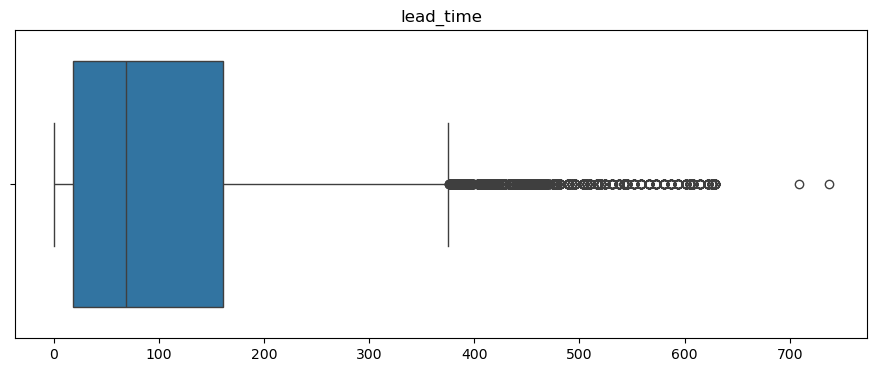

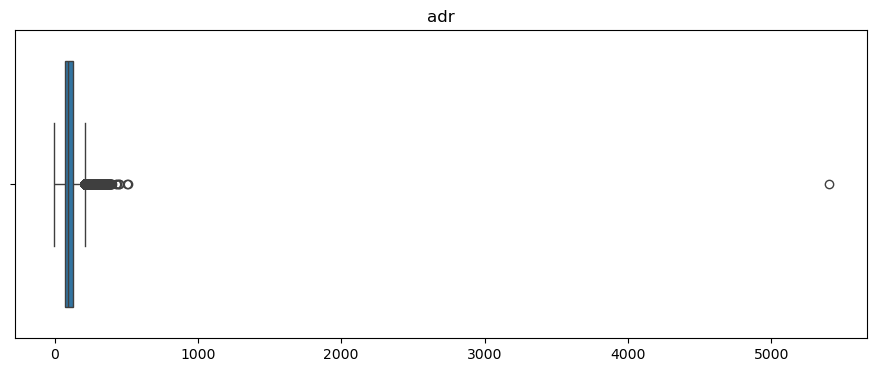

In [32]:
# looping boxplot to seek for outlier
column_to_handle = ["lead_time", "adr"]
for index, col in enumerate(column_to_handle):
    plt.figure(figsize=(11,4))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

plt.show()

In [33]:
# identify lower and upper bound of each column's outlier
outlier_dict = {
    "Lower Bound": [],
    "Upper Bound": [],
    "Total Outlier": [],
    "Percentage of All": []
}

# iterate
for col in column_to_handle: # column_to_handle has been previously assigned
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    floor = Q1 - 1.5 * IQR
    ceiling = Q3 + 1.5 * IQR
    
    total_outlier = len(df[(df[col] < floor) | (df[col] > ceiling)])
    outlier_percentage = total_outlier / len(df) * 100

    # append
    outlier_dict["Lower Bound"].append(round(floor, 2))
    outlier_dict["Upper Bound"].append(round(ceiling, 2))
    outlier_dict["Total Outlier"].append(total_outlier)
    outlier_dict["Percentage of All"].append(round(outlier_percentage, 2))

pd.DataFrame(outlier_dict, index=column_to_handle)

,Lower Bound,Upper Bound,Total Outlier,Percentage of All
lead_time,-196.5,375.5,2982,2.51
adr,-14.0,210.0,3883,3.27


In [34]:
# outlier on lead_time
lead_time_Q1 = df["lead_time"].quantile(0.25)
lead_time_Q3 = df["lead_time"].quantile(0.75)
lead_time_IQR = lead_time_Q3 - lead_time_Q1

lead_time_floor = lead_time_Q1 - 1.5 * lead_time_IQR
lead_time_ceiling = lead_time_Q3 + 1.5 * lead_time_IQR

df = df[~((df["lead_time"] < lead_time_floor) | (df["lead_time"] > lead_time_ceiling))]

In [35]:
# outlier on adr
adr_Q1 = df["adr"].quantile(0.25)
adr_Q3 = df["adr"].quantile(0.75)
adr_IQR = adr_Q3 - adr_Q1

adr_ceiling = adr_Q3 + 1.5 * adr_IQR

df = df[~((df["adr"] < 60) | (df["adr"] > adr_ceiling))]

We removed all lead_time outliers using the IQR calculation. For the adr outliers, we re-evaluated boundaries to ensure the lower bound is not less than 60, as it is not possible for adr to have a negative value. We researched the logical minimum average hotel price from several sources<sup>[1](https://trek.zone/en/portugal/prices), [2](https://www.budgetyourtrip.com/hotels/portugal-PT), [3](https://bettertravel.ai/hotel-prices/portugal)</sup>.

## Removing Duplicated Data

In [38]:
df.drop_duplicates(inplace=True)

We remove duplicates in the dataset because:
1. Redundant, which doesn't add more value to the analysis.
2. Inaccuracy, which lead to skewness.

## Data Transformation

### Changing Date Format

In [42]:
# combining datetime
df["arrival_date"] = pd.to_datetime(
    df["arrival_date_year"].astype(str) + " " +
    df["arrival_date_month"] + " " +
    df["arrival_date_day_of_month"].astype(str),
    format="%Y %B %d"
)

### Relabeling Meal Value

In [44]:
df["meal"] = df["meal"].replace("Undefined", "SC")

## Saving Clean Data

In [46]:
df.shape

(66831, 14)

The number of columns has been reduced from 32 to 11, and the number of rows has decreased from 119,390 to 66,831.

In [48]:
df.to_csv("hotel_booking_cleaned.csv", index=False)

# Data Analysis

## Portion of cancellation

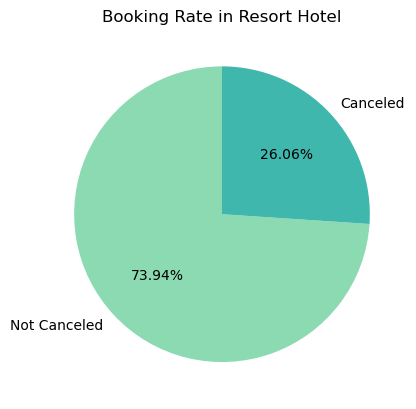

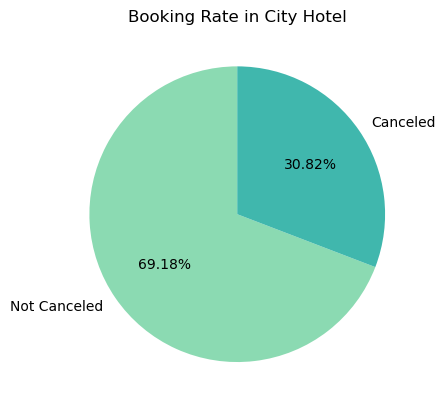

In [51]:
listHotel = [i for i in df["hotel"].unique()] 
for hotel in listHotel:
    df_hotel = df[df["hotel"] == hotel]
    booking_portion = df_hotel.groupby("is_canceled").size().reset_index(name="count")
    booking_portion["is_canceled"] = booking_portion["is_canceled"].replace({0: "Not Canceled", 1: "Canceled"})

    colors = sns.color_palette("mako_r")
    plt.pie(x="count", labels="is_canceled", data=booking_portion, autopct='%1.2f%%', startangle=90, colors=colors)
    plt.title(f"Booking Rate in {hotel}")
    plt.show()

**Insight**

It is known that 26.06 percent of bookings were canceled in Resort Hotel, while 30.82 percent of bookings were canceled in City Hotel.

## cancellation by Country

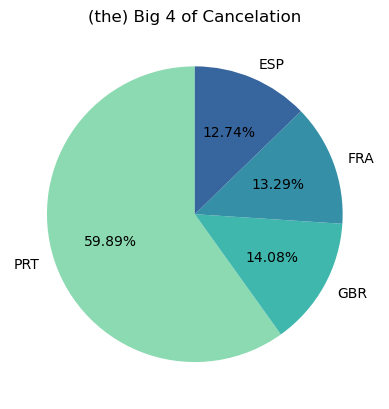

In [54]:
country_canceling = df[df["is_canceled"] == 1].groupby("country").size().reset_index(name="count").sort_values(by="count", ascending=False).head(4)

colors = sns.color_palette("mako_r")
plt.pie(x="count", labels="country", data=country_canceling, autopct='%1.2f%%', startangle=90, colors=colors)
plt.title("(the) Big 4 of cancellation")
plt.show()

**Insight**

Highest number of cancellations came from Portugal's themselves, as the majority of visitors to both hotels are domestic travelers. Apart from that, the other top three cancellations came from Great Britain, France, and Spain.

## cancellation Over Time

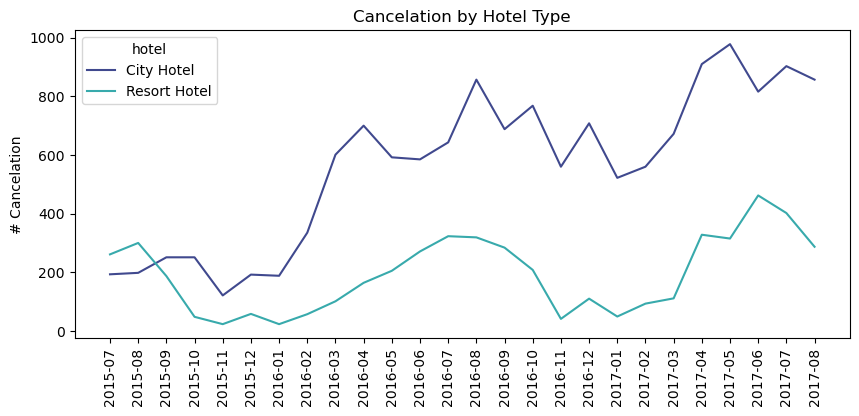

In [57]:
df["arrival_monthly"] = df["arrival_date"].dt.to_period("M").astype(str)

canceled_booking = df[df["is_canceled"] == 1].groupby(["hotel", "arrival_monthly"])["is_canceled"].value_counts().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x="arrival_monthly", y="count", data=canceled_booking, hue="hotel", palette="mako")
plt.title("cancellation by Hotel Type")
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("# cancellation")
plt.show()

**Insight**
1. Booking at City Hotel has been increasingly canceled each year, rising from 193 in Q3 of 2015 to over 643 in Q3 of 2016, and continuing to increase in 2017.
2. Similarly, cancellation at Resort Hotel have also escalated, climbing from 261 in Q3 of 2015 to over 323 in Q3 of 2016, with an ongoing increase throughout 2017.

## ADR Fluctuation Between Bookings and cancellation

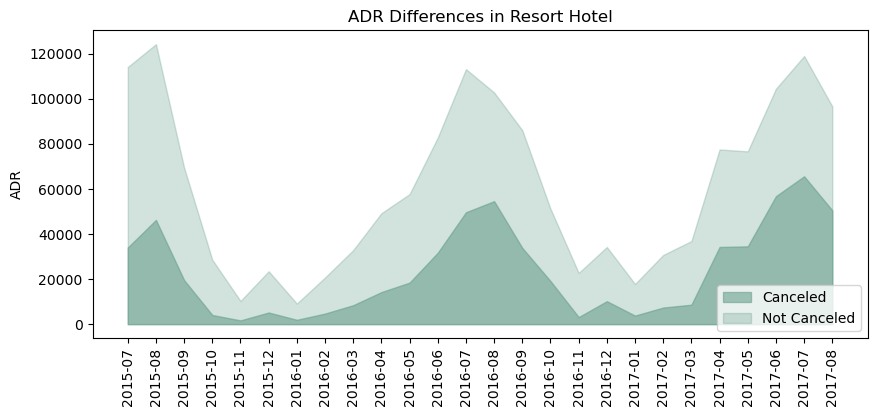

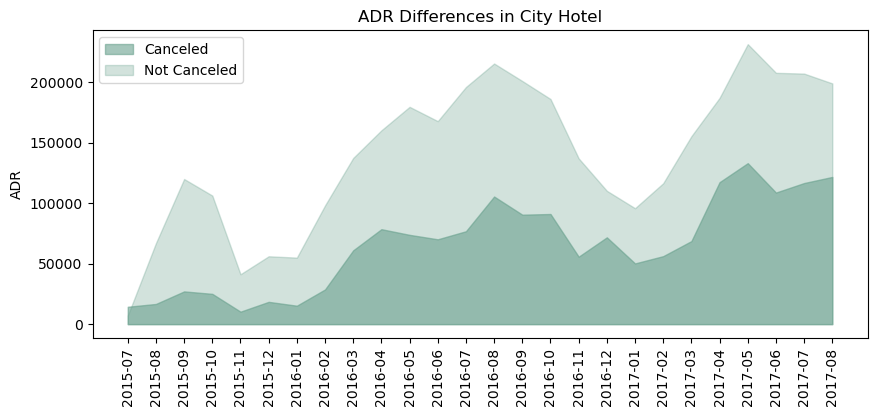

In [60]:
for hotel in listHotel:
    df_hotel = df[df["hotel"] == hotel]
    adr_trend = df_hotel.groupby(["is_canceled", "arrival_monthly"])["adr"].sum().reset_index()
    adr_canceled = adr_trend[adr_trend["is_canceled"] == 1]
    adr_notCanceled = adr_trend[adr_trend["is_canceled"] == 0]
    
    plt.figure(figsize=(10,4))
    plt.fill_between(adr_canceled["arrival_monthly"], adr_canceled["adr"], color="#6aa18e", alpha=0.6, label="Canceled")
    plt.fill_between(adr_notCanceled["arrival_monthly"], adr_notCanceled["adr"], color="#6aa18e", alpha=0.3, label="Not Canceled")
    
    plt.plot(adr_canceled["arrival_monthly"], adr_canceled["adr"], color="#6aa18e", alpha=0)
    plt.plot(adr_notCanceled["arrival_monthly"], adr_notCanceled["adr"], color="#6aa18e", alpha=0)

    plt.title(f"ADR Differences in {hotel}")
    plt.legend()
    plt.xlabel("")
    plt.xticks(rotation=90)
    plt.ylabel("ADR")
    plt.show()

**Insight**
1. For City Hotels, there is a notable difference in the average nightly income between guests who follow through with their bookings and those who cancel. The income generated from guests who do not cancel is significantly higher compared to those who canceled their reservations.
2. It goes the same for Resort Hotel. They could potentially gain more revenue from customers who stays and order additional services. This can be seen from the ADR cancellation data, which highlights the daily revenue that lost when compared to the non canceled booking.

## Total Profit and cancellation Rate From Each Hotel

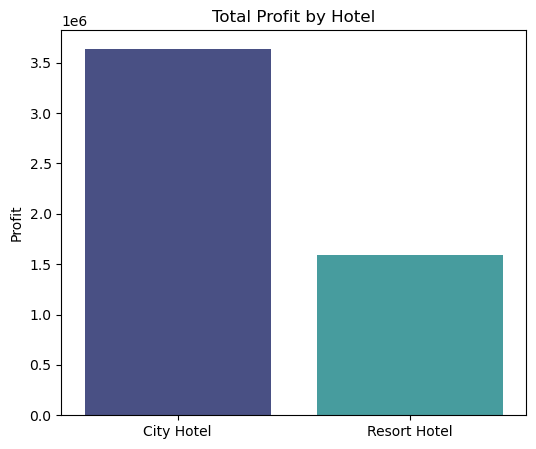

In [63]:
notCanceled_booking = df[df["is_canceled"] == 0]
hotel_profit = notCanceled_booking.groupby("hotel")["adr"].sum().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="hotel", y="adr", data=hotel_profit, hue="hotel", palette="mako")
plt.title("Total Profit by Hotel")
plt.xlabel("")
plt.ylabel("Profit")
plt.show()

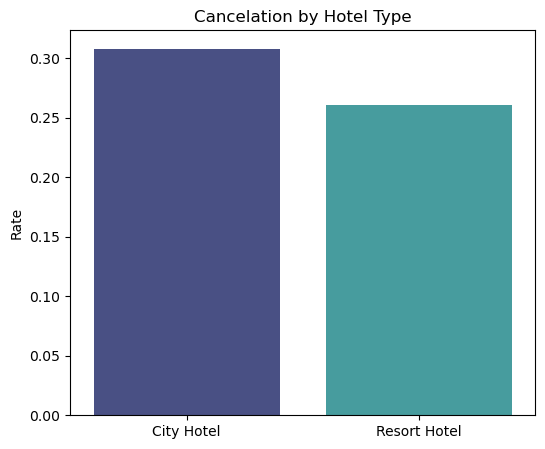

In [64]:
cancel_rate = df.groupby("hotel")["is_canceled"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="hotel", y="is_canceled", data=cancel_rate, hue="hotel", palette="mako")
plt.title("cancellation by Hotel Type")
plt.xlabel("")
plt.ylabel("Rate")
plt.show()

**Insight**

Based on the data, it is known that City Hotel is more profitable, twice as much as Resort Hotel, but experiences cancellations more frequently.

## Highest Booking Season

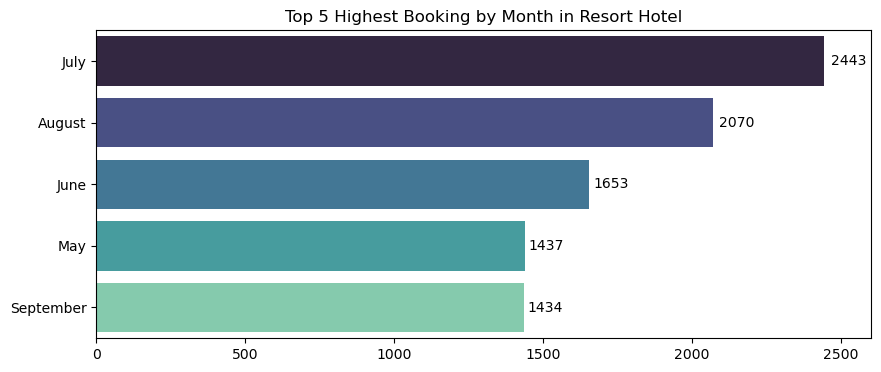

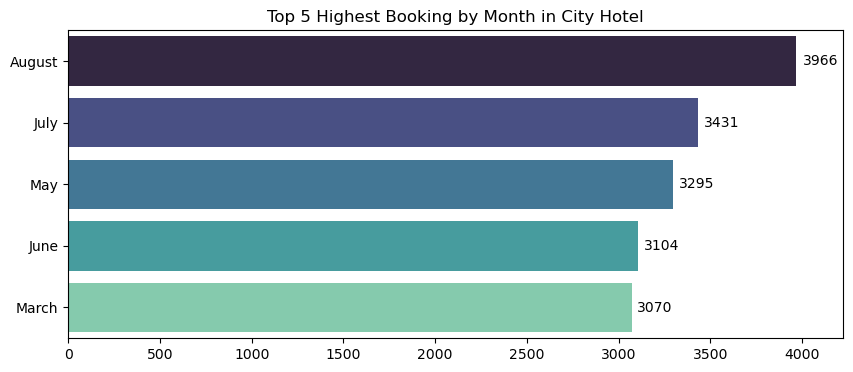

In [67]:
for hotel in listHotel:
    df_hotel = df[df["hotel"] == hotel]
    df_notCanceled = df_hotel[df_hotel["is_canceled"] == 0]
    df_month_byHotel = df_notCanceled.groupby("arrival_date_month").size().sort_values(ascending=False).reset_index(name="count")

    plt.figure(figsize=(10,4))
    sns.barplot(x="count", y="arrival_date_month", data=df_month_byHotel.head(5), hue="arrival_date_month", palette="mako")
    plt.title(f"Top 5 Highest Booking by Month in {hotel}")
    plt.xlabel("")
    plt.ylabel("")

    max_value = df_month_byHotel["count"].max()
    plt.xlim(0, max_value * 1.065)
    
    for index, value in enumerate(df_month_byHotel["count"].head(5)):
        plt.text(value * 1.01, index, str(round(value, 2)), va="center", ha="left")

    plt.show()

**Insight**

From the data, it is known that the highest bookings for both hotels occur in the second and third quarters of the year.

## Lead Time Impact on cancellation Rate

In [70]:
# calculate the mean of the lead time
avg_lead_time = df.groupby('arrival_monthly')['lead_time'].mean().reset_index()

# calculate mean of canceled booking by month
cancel_rate = df.groupby('arrival_monthly')['is_canceled'].mean().reset_index()
cancel_rate["is_canceled"] = cancel_rate["is_canceled"] * 100

### Normality Test
Here we use the Kolgomorov-Smirnov Test.

In [72]:
stat, p_value = ks_2samp(avg_lead_time["lead_time"], cancel_rate["is_canceled"])
alpha = 0.05

if p_value < alpha:
    print("Values are not normally distributed.")
else:
    print("Values are normally distributed.")

Values are not normally distributed.


### Hypothesis Testing
Because the data is not normally distributed, the Spearman Test is used.

In [74]:
print("""Hypothesis:
H0: There is no correlation between lead time and cancellation rate.
H1: There is a correlation between lead time and cancellation rate.
Criteria: Reject null hypothesis if the p_value ≤ alpha.
""")

r_value, p_value = spearmanr(cancel_rate["is_canceled"], avg_lead_time["lead_time"])
alpha = 0.05

print(f"rho: {r_value}")
print(f"P-value: {p_value}")

if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Hypothesis:
H0: There is no correlation between lead time and cancellation rate.
H1: There is a correlation between lead time and cancellation rate.
Criteria: Reject null hypothesis if the p_value ≤ alpha.

rho: 0.7429059829059829
P-value: 1.3805977951239306e-05
Reject the null hypothesis.


**Insight**

From the hypothesis testing, it can be concluded that there is a strong positive correlation between lead time and cancellation rate.

In [76]:
y = cancel_rate["is_canceled"]
x = avg_lead_time["lead_time"]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     27.86
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.06e-05
Time:                        18:07:19   Log-Likelihood:                -70.449
No. Observations:                  26   AIC:                             144.9
Df Residuals:                      24   BIC:                             147.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8378      1.910      9.860      0.0

**Insight**

Based on the regression result, it can be concluded that:
1. 53.7 percent of the variation in the dependent variable, namely cancellation Rate, can be explain by the variation in the independent variable, namely Lead Time.
2. Lead Time variable significantly positively affects the cancellation Rate variable, where every 1-day increase in Lead Time leads to a 0.129 percent increase in cancellation Rate.
3. The estimated value of cancellation Rate is 18.838 percent, ceteris paribus.

## Deposit Type Correlation with cancellations

### Hypothesis Test
Here we use the Chi-Square Test.

In [80]:
print("""Hypothesis:
H0: There is no correlation between deposit type and booking cancellation.
H1: There is a correlation between deposit type and booking cancellation.
Criteria: Reject null hypothesis if the p_value ≤ alpha.
""")

# counting each deposit type frequency
contingencyTable = pd.crosstab(df["deposit_type"], df["is_canceled"])

# performing the chi-square
stat, p_value, dof, expected = chi2_contingency(contingencyTable)
alpha = 0.05

# check if expected frequency is > 5
print(f"Expected Frequency:\n{expected}\n")

if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Hypothesis:
H0: There is no correlation between deposit type and booking cancellation.
H1: There is a correlation between deposit type and booking cancellation.
Criteria: Reject null hypothesis if the p_value ≤ alpha.

Expected Frequency:
[[4.66009726e+04 1.94490274e+04]
 [5.03756161e+02 2.10243839e+02]
 [4.72712364e+01 1.97287636e+01]]

Reject the null hypothesis.


**Insight**

From the hypothesis testing, it can be concluded that there is a correlation between deposit type and booking cancellation.

## Meal Impact on ADR

In [83]:
df_meal = df.copy()
df_meal["is_having_meal"] = df_meal["meal"].apply(lambda x: 0 if x == "SC" else 1 if x  == "BB" else 2 if x == "HB" else 3 if x == "FB" else None)

canceled_meal = df_meal[(df_meal["is_canceled"] == 1) & (df_meal["is_having_meal"] != 0)]

### Normality Test
Here we use the Kolgomorov-Smirnov Test.

In [85]:
stat, p_value = ks_2samp(canceled_meal["is_having_meal"], canceled_meal["adr"])
alpha = 0.05

if p_value < alpha:
    print("Values are not normally distributed.")
else:
    print("Values are normally distributed.")

Values are not normally distributed.


### Hypothesis Testing
Because the data is not normally distributed, the Spearman Test is used.

In [87]:
print("""Hypothesis:
H0: There is no correlation between meal and ADR.
H1: There is a correlation between meal and ADR.
Criteria: Reject null hypothesis if the p_value ≤ alpha.
""")

r_value, p_value = spearmanr(canceled_meal["is_having_meal"], canceled_meal["adr"])
alpha = 0.05

print(f"rho: {r_value}")
print(f"P-value: {p_value}")

if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Hypothesis:
H0: There is no correlation between meal and ADR.
H1: There is a correlation between meal and ADR.
Criteria: Reject null hypothesis if the p_value ≤ alpha.

rho: 0.11957936169952711
P-value: 2.5840134842906585e-53
Reject the null hypothesis.


**Insight**

From the hypothesis testing, it can be concluded that there is a weak positive correlation between meal and ADR.

In [89]:
y = canceled_meal["adr"]
x = canceled_meal["is_having_meal"]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    adr   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     284.6
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.52e-63
Time:                        18:07:21   Log-Likelihood:                -82631.
No. Observations:               16406   AIC:                         1.653e+05
Df Residuals:                   16404   BIC:                         1.653e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            104.8995      1.021    102.

**Insight**

Based on the regression result, it can be concluded that:
1. 1.7 percent of the variation in the dependent variable, namely ADR, can be explain by the variation in the independent variable, namely Meal.
2. Meal variable significantly positively affects the ADR, where every 1 unit increase in meal leads to a 14.779 unit increase in potential ADR gained.
3. The estimated value of potential ADR is 104.889 unit, ceteris paribus.

## Special Requests Impact on ADR

In [92]:
canceled_special_requests = df[(df["is_canceled"] == 1) & (df["total_of_special_requests"] > 0)]

### Normality Test
Here we use the Kolgomorov-Smirnov Test.

In [94]:
stat, p_value = ks_2samp(canceled_special_requests["total_of_special_requests"], canceled_special_requests["adr"])
alpha = 0.05

if p_value < alpha:
    print("Values are not normally distributed.")
else:
    print("Values are normally distributed")

Values are not normally distributed.


### Hypothesis Testing
Because the data is not normally distributed, the Spearman Test is used.

In [96]:
print("""Hypothesis:
H0: There is no correlation between special request and ADR.
H1: There is a correlation between special request and ADR.
Criteria: Reject null hypothesis if the p_value ≤ alpha.
""")

r_value, p_value = spearmanr(canceled_special_requests["total_of_special_requests"], canceled_special_requests["adr"])
alpha = 0.05

print(f"rho: {r_value}")
print(f"P-value: {p_value}")

if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Hypothesis:
H0: There is no correlation between special request and ADR.
H1: There is a correlation between special request and ADR.
Criteria: Reject null hypothesis if the p_value ≤ alpha.

rho: 0.016257291944177382
P-value: 0.14801360505382258
Fail to reject the null hypothesis.


**Insight**

From the hypothesis testing, it can be concluded that there is no correlation between special requests and ADR.

## cancellation Impact on Potential ADR

In [99]:
df_canceled = df[df["is_canceled"] == 1]
df_noncanceled = df[df["is_canceled"] == 0]

### Normality Test
Here we use the Kolgomorov-Smirnov Test.

In [101]:
stat, p_value = ks_2samp(df_canceled["adr"], df_noncanceled["adr"])
alpha = 0.05

if p_value < alpha:
    print("Values are not normally distributed.")
else:
    print("Values are normally distributed.")

Values are not normally distributed.


### Hypothesis Testing
Here we use the Mann-Whitney U Test.

In [103]:
print("""Hypothesis:
H0: There is no correlation between cancellation and potential ADR.
H1: There is a correlation between cancellation and potential ADR.
Criteria: Reject null hypothesis if the p_value ≤ alpha.
""")

stat, p_value = mannwhitneyu(df_canceled["adr"], df_noncanceled["adr"])
alpha = 0.05

print(f"rho: {r_value}")
print(f"P-value: {p_value}")

if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Hypothesis:
H0: There is no correlation between cancellation and potential ADR.
H1: There is a correlation between cancellation and potential ADR.
Criteria: Reject null hypothesis if the p_value ≤ alpha.

rho: 0.016257291944177382
P-value: 1.0980914674718216e-135
Reject the null hypothesis.


**Insight**

From the hypothesis testing, it can be concluded that there is a correlation between cancellation and potential ADR. In other words, potential ADR can be affected by the booking cancellation.

# Conclusion

Based on the analysis conducted, the following conclusions can be drawn:
1. Most cancellations occured between July and September, with a significant decrease from November to February.
2. Most cancellations were made by European tourists, especially domestic travelers from Lisbon.
3. The hotel loss lots of potential revenue, evident from the ADR difference between canceled and non canceled bookings. This could be a huge blow to the hotel's financial stability, potentially impacting it's ability to operate in the future.
4. A longer lead time (the time between the booking made and arrival) leads to a higher booking cancellations.

# Recommendation

Several recommendation can be made:
1. The hotel should consider limiting the advance hotel booking, ideally allowing bookings no more than 3 months before the arrival.
2. The hotel should also send reminders 1 month, 2 weeks, and the day before arival date, in case guests forget their booking. Reminders can be made via email and/or messaging platform.
3. The hotel could add promotion for Resort Hotel, such as room rates and additional requests, during July and August when ADR is at its peak.
4. To minimize booking cancellations, the hotel should revise its deposit policy. A full refund can be provided for cancellations made at least one month before the arrival date, a 50% for 2 weeks prior, and no refund for cancellations made within 3 days of arrival.